# The Deutsch Algorithm (Statevector Simulation)
**Goal:** Implement and understand the Deutsch algorithm — the first quantum algorithm.

**Author:** Satya Pal  
**Series:** Qiskit 101 (Part 5)
**Environment:** Qiskit 2.x, Python 3.13


In [1]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [2]:
def deutsch_oracle(f_type: str) -> QuantumCircuit:
    """
    Create a 2-qubit oracle circuit for a given function type.
    f_type: 'constant0', 'constant1', 'balanced'
    """
    oracle = QuantumCircuit(2)
    
    if f_type == 'constant1':
        oracle.x(1)  # Always flip output qubit
    elif f_type == 'balanced':
        oracle.cx(0, 1)  # Flip output qubit depending on input
    # constant0 = do nothing
    
    return oracle


In [3]:
def deutsch_circuit(f_type: str) -> QuantumCircuit:
    qc = QuantumCircuit(2)
    
    # Step 1: Initialize |0⟩|1⟩
    qc.x(1)
    
    # Step 2: Apply Hadamard to both qubits
    qc.h([0, 1])
    
    # Step 3: Apply oracle
    qc.compose(deutsch_oracle(f_type), inplace=True)
    
    # Step 4: Apply Hadamard to first qubit again
    qc.h(0)
    
    # Step 5: Measure first qubit (conceptually)
    return qc


Balanced Oracle:

Constant Oracle:


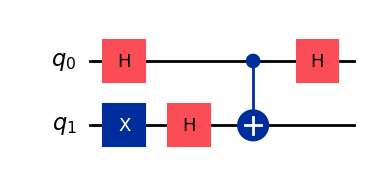

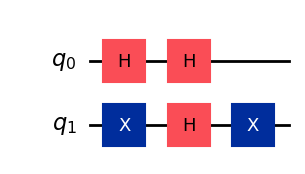

In [4]:
qc_balanced = deutsch_circuit('balanced')
qc_constant = deutsch_circuit('constant1')

print("Balanced Oracle:")
_ = qc_balanced.draw('mpl')

print("\nConstant Oracle:")
_ = qc_constant.draw('mpl')


Function Type: constant1 → Detected as: Balanced
Function Type: balanced → Detected as: Balanced


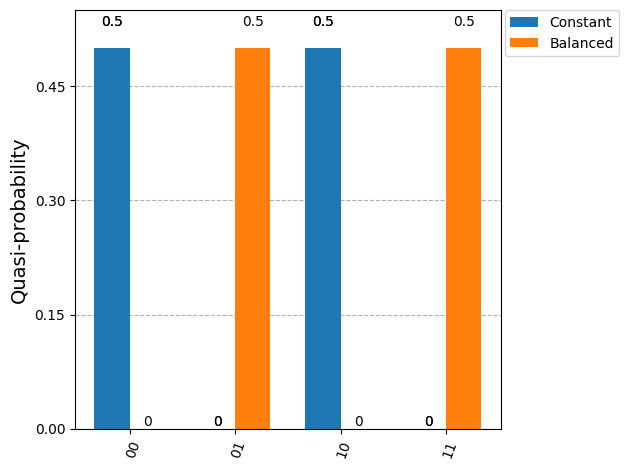

In [5]:
def deutsch_result(f_type: str):
    qc = deutsch_circuit(f_type)
    state = Statevector.from_instruction(qc)
    probs = state.probabilities_dict()
    
    # Get measurement probability for first qubit = 0 or 1
    result = 'Constant' if probs.get('00', 0) + probs.get('01', 0) > 0.5 else 'Balanced'
    
    print(f"Function Type: {f_type} → Detected as: {result}")
    return probs

# Run both cases
probs_const = deutsch_result('constant1')
probs_bal = deutsch_result('balanced')

# Show histograms
plot_histogram([probs_const, probs_bal], legend=['Constant', 'Balanced'])
plt.show()


# Understanding the Result
- If the **first qubit measures 0**, the function is **constant**.
- If the **first qubit measures 1**, the function is **balanced**.
- The quantum circuit uses **superposition** and **interference** to learn the property of the function with only **one query** — a clear quantum advantage.

> “Nature isn’t classical, dammit, and if you want to make a simulation of nature, you’d better make it quantum mechanical.” — Richard Feynman
